In [28]:
import os
import keras
import argparse
import numpy as np
from affine_utils import (
    gen_rand_points_within_poly,
    original_data_loader,
    give_polys,
    plot_dataset,
)
from shapely.affinity import scale
from matplotlib import pyplot as plt
import colorsys

In [2]:
direc = os.getcwd()
path_read_repair = direc + "/tc1/repair_net"
path_read_orig_model = direc + "/tc1/original_net"

model_orig = keras.models.load_model(path_read_orig_model + "/model")
model_repair_1 = keras.models.load_model(path_read_repair + "/model_layer_1")
model_repair_2 = keras.models.load_model(path_read_repair + "/model_layer_2")
model_repair_3 = keras.models.load_model(path_read_repair + "/model_layer_3")

2022-03-22 19:25:27.732500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [80]:
poly_orig, _, poly_const = give_polys()

In [75]:
def plot_meshgird(poly, mesh_data, mesh_color, title):
    x_poly, y_poly = poly.exterior.xy
    plt.title(title)
    plt.plot(
        x_poly,
        y_poly,
        color = 'black',
        alpha=0.7,
        linewidth=1,
        solid_capstyle="round",
        zorder=2,
    )
    for r in range(mesh_data[0].shape[0]):
        for c in range(mesh_data[0].shape[1]):
            RGB = colorsys.hsv_to_rgb(0., mesh_color[0][r,c]*mesh_color[1][r,c], 1.)
            plt.scatter(mesh_data[0][r,c], mesh_data[1][r,c], color=RGB, linewidth=3)
    plt.axis('off')
    plt.show()

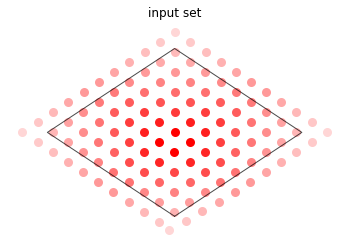

In [79]:
# meshgri on input
n_x = 11
X = np.linspace(1,4,n_x)
Y = np.linspace(1,4,n_x)
xx, yy = np.meshgrid(X,Y)

# color meshgrid
mesh_disc = np.append(np.linspace(0.4,1,int(n_x/2)), np.linspace(1,0.4,n_x-int(n_x/2)))
color_x, color_y = np.meshgrid(mesh_disc,mesh_disc)

# plot_meshgird(poly_orig, (xx,yy), (color_x,color_y), 'input set')

# original model
x_out, y_out = net_meshgrid_prediction(xx,yy,model_orig)
plot_meshgird(poly_const, (x_out, y_out), (color_x,color_y), 'input set')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


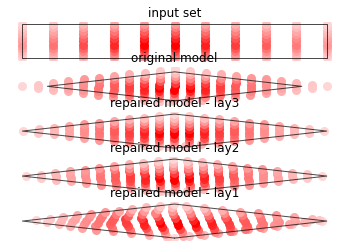

In [74]:
# Poly bounds
x_poly_orig, y_poly_orig = poly_orig.exterior.xy
x_poly_const, y_poly_const = poly_const.exterior.xy

# meshgri on input
n_x = 11
X = np.linspace(1,4,n_x)
Y = np.linspace(1,4,n_x)
xx, yy = np.meshgrid(X,Y)

# color meshgrid
mesh_disc = np.append(np.linspace(0.4,1,int(n_x/2)), np.linspace(1,0.4,n_x-int(n_x/2)))
color_x, color_y = np.meshgrid(mesh_disc,mesh_disc)

# plot input set
fig, axs = plt.subplots(5, 1)

## plot original set
axs[0].set_title('input set')
axs[0].plot(
    x_poly_orig,
    y_poly_orig,
    color = 'black',
    alpha=0.7,
    linewidth=1,
    solid_capstyle="round",
    zorder=2,
)
for r in range(xx.shape[0]):
    for c in range(xx.shape[1]):
        RGB = colorsys.hsv_to_rgb(0., color_y[r,c]*color_x[r,c], 1.)
        axs[0].scatter(xx[r,c], yy[r,c], color=RGB, linewidth=3)
axs[0].axis('off')

# plot original model
axs[1].set_title('original model')
x_out, y_out = net_meshgrid_prediction(xx,yy,model_orig)
axs[1].plot(
    x_poly_const,
    y_poly_const,
    color = 'black',
    alpha=0.7,
    linewidth=1,
    solid_capstyle="round",
    zorder=2,
)
for r in range(xx.shape[0]):
    for c in range(xx.shape[1]):
        RGB = colorsys.hsv_to_rgb(0., color_y[r,c]*color_x[r,c], 1.)
        axs[1].scatter(x_out[r,c], y_out[r,c], color=RGB, linewidth=3)
axs[1].axis('off')

# plot repair model lay3
axs[2].set_title('repaired model - lay3')
x_out, y_out = net_meshgrid_prediction(xx,yy,model_repair_3)
axs[2].plot(
    x_poly_const,
    y_poly_const,
    color = 'black',
    alpha=0.7,
    linewidth=1,
    solid_capstyle="round",
    zorder=2,
)
for r in range(xx.shape[0]):
    for c in range(xx.shape[1]):
        RGB = colorsys.hsv_to_rgb(0., color_y[r,c]*color_x[r,c], 1.)
        axs[2].scatter(x_out[r,c], y_out[r,c], color=RGB, linewidth=3)
axs[2].axis('off')

# plot original model
axs[3].set_title('repaired model - lay2')
x_out, y_out = net_meshgrid_prediction(xx,yy,model_repair_2)
axs[3].plot(
    x_poly_const,
    y_poly_const,
    color = 'black',
    alpha=0.7,
    linewidth=1,
    solid_capstyle="round",
    zorder=2,
)
for r in range(xx.shape[0]):
    for c in range(xx.shape[1]):
        RGB = colorsys.hsv_to_rgb(0., color_y[r,c]*color_x[r,c], 1.)
        axs[3].scatter(x_out[r,c], y_out[r,c], color=RGB, linewidth=3)
axs[3].axis('off')

# plot original model
axs[4].set_title('repaired model - lay1')
x_out, y_out = net_meshgrid_prediction(xx,yy,model_repair_1)
axs[4].plot(
    x_poly_const,
    y_poly_const,
    color = 'black',
    alpha=0.7,
    linewidth=1,
    solid_capstyle="round",
    zorder=2,
)
for r in range(xx.shape[0]):
    for c in range(xx.shape[1]):
        RGB = colorsys.hsv_to_rgb(0., color_y[r,c]*color_x[r,c], 1.)
        axs[4].scatter(x_out[r,c], y_out[r,c], color=RGB, linewidth=3)
axs[4].axis('off')



plt.savefig('plot_comp.eps')

In [26]:
def net_meshgrid_prediction(x, y, model):
    row, col = x.shape
    x_out = np.zeros((row,col))
    y_out = np.zeros((row,col))
    for r in range(row):
        for c in range(col):
            temp = model.predict(np.array([[x[r,c], y[r,c], 1]]))
            x_out[r,c] = temp.flatten()[0]
            y_out[r,c] = temp.flatten()[1]
    return x_out, y_out
    
    

In [27]:
x_out, y_out = net_meshgrid_prediction(xx,yy,model_orig)

In [24]:
yy

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
        1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333],
       [1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
        1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667],
       [2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ],
       [2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.33333333,
        2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.33333333],
       [2.66666667, 2.66666667, 2.66666667, 2.66666667, 2.66666667,
        2.66666667, 2.66666667, 2.66666667, 2.66666667, 2.66666667],
       [3.        , 3.        , 3.        , 3.        , 3.        ,
        3.        , 3.        , 3.        , 3.        , 3.        ],
       [3.33333333, 3.33333333, 3.3333333

----------------------
Data samples Visualization (training)


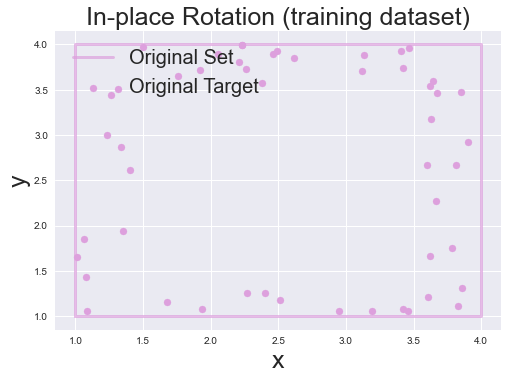

In [14]:
plot_dataset([poly_orig], [x], label="training")